In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


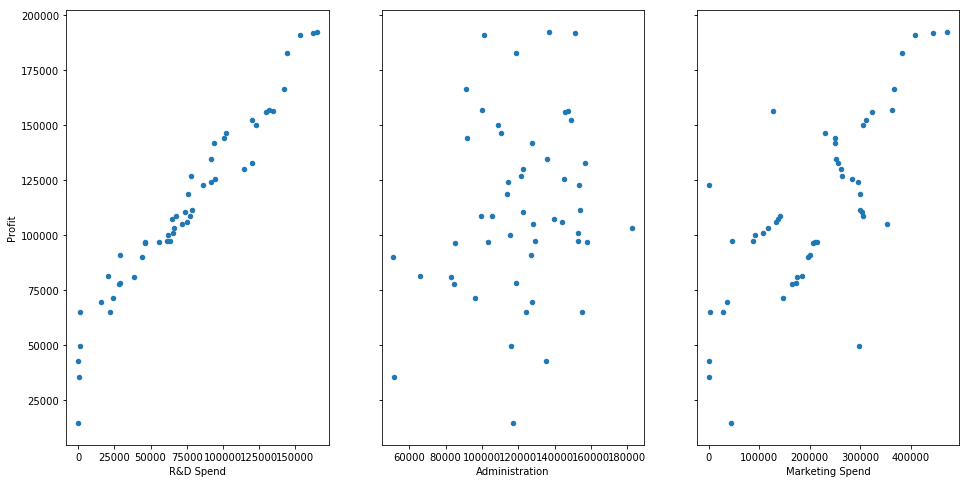

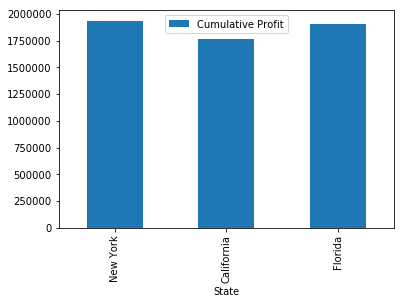

In [3]:
# Visualizing the dataset

fig, axs = plt.subplots(1, 3, sharey=True)
dataset.plot(kind='scatter',x = 'R&D Spend', y = 'Profit',ax=axs[0], figsize=(16,8))
dataset.plot(kind='scatter',x = 'Administration', y = 'Profit',ax=axs[1])
dataset.plot(kind='scatter',x = 'Marketing Spend',y = 'Profit',ax=axs[2])
categories = dataset['State'].unique().tolist()
categories_profit = []
for state in categories:
    categories_profit.append(dataset.loc[dataset['State'] == state,'Profit'].sum())
dataset_temp = pd.DataFrame({'State':categories, 'Cumulative Profit':categories_profit})
dataset_temp.plot(kind='bar',x = 'State', y = 'Cumulative Profit')

In [16]:
# Encoding the categorical data

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

In [17]:
# Avoiding the dummy variable trap.
X = X[:, 1:]


In [18]:
# Splitting the dataset into training set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [19]:
# Fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

print(regressor.score(X_test,y_test))
print(regressor.coef_)
print(regressor.intercept_)

0.934706847328
[ -9.59284160e+02   6.99369053e+02   7.73467193e-01   3.28845975e-02
   3.66100259e-02]
42554.1676177


In [21]:
# Importing the statsmodels library and preparing the dataset

import statsmodels.formula.api as sm

X = np.append(arr=np.ones((50,1)).astype(int), values=X, axis=1)
print(X)

[[  1.00000000e+00   0.00000000e+00   1.00000000e+00   1.65349200e+05
    1.36897800e+05   4.71784100e+05]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   1.62597700e+05
    1.51377590e+05   4.43898530e+05]
 [  1.00000000e+00   1.00000000e+00   0.00000000e+00   1.53441510e+05
    1.01145550e+05   4.07934540e+05]
 [  1.00000000e+00   0.00000000e+00   1.00000000e+00   1.44372410e+05
    1.18671850e+05   3.83199620e+05]
 [  1.00000000e+00   1.00000000e+00   0.00000000e+00   1.42107340e+05
    9.13917700e+04   3.66168420e+05]
 [  1.00000000e+00   0.00000000e+00   1.00000000e+00   1.31876900e+05
    9.98147100e+04   3.62861360e+05]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   1.34615460e+05
    1.47198870e+05   1.27716820e+05]
 [  1.00000000e+00   1.00000000e+00   0.00000000e+00   1.30298130e+05
    1.45530060e+05   3.23876680e+05]
 [  1.00000000e+00   0.00000000e+00   1.00000000e+00   1.20542520e+05
    1.48718950e+05   3.11613290e+05]
 [  1.00000000e+00   0.00000000e+00  

In [33]:
# Building the optimal model using backward elimination

X_opt = X[:,[0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
regressor_OLS.params

X_opt = X[:,[0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

X_opt = X[:,[0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

X_opt = X[:,[0, 3, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

X_opt = X[:,[0, 3]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
regressor_OLS.params

array([  4.90328991e+04,   8.54291371e-01])